In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
from scipy.ndimage import shift

In [5]:
from matplotlib import image

In [6]:
img = image.imread('/usr/share/backgrounds/Aerial-Road-by-James-Adams.jpg')

In [7]:
from matplotlib import pyplot as plt

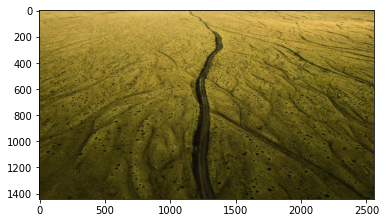

In [8]:
plt.imshow(img)

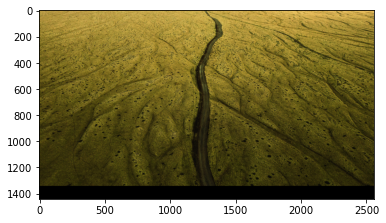

In [9]:
img_shift = shift(img, [-100,0,0], cval=0)
plt.imshow(img_shift)

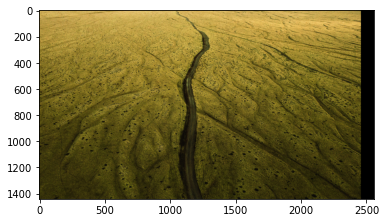

In [10]:
img_shift = shift(img, [0, -100, 0])
plt.imshow(img_shift)

In [11]:
type(img_shift)

numpy.ndarray

In [12]:
img.shape

(1440, 2560, 3)

In [13]:
img_shift.shape

(1440, 2560, 3)

In [14]:
X = mnist.data

In [15]:
y = mnist.target

In [16]:
type(X)

numpy.ndarray

In [17]:
X.shape

(70000, 784)

In [18]:
import numpy as np

In [25]:
def shift_mnist_image(image, shift_direction):
    image_reshaped = np.reshape(image, (28,28))
    if shift_direction.lower == 'right':
        shifted_image = shift(image_reshaped, [0,1], cval=0)
    elif shift_direction.lower == 'left':
        shifted_image = shift(image_reshaped, [0,-1], cval=0)
    elif shift_direction.lower == 'up':
        shifted_image = shift(image_reshaped, [-1, 0], cval=0)
    else:
        shifted_image = shift(image_reshaped, [1,0], cval=0)

    final_image = np.reshape(shifted_image, (1,784))
    return final_image

In [26]:
upshifted_data = np.zeros(shape=(70000,784))
downshifted_data = np.zeros(shape=(70000,784))
rightshifted_data = np.zeros(shape=(70000,784))
leftshifted_data = np.zeros(shape=(70000,784))


In [33]:
i = 1
while i < 70000:
    upshift = shift_mnist_image(X[i], 'up')
    downshift = shift_mnist_image(X[i], 'down')
    leftshift = shift_mnist_image(X[i], 'left')
    rightshift = shift_mnist_image(X[i], 'right')
    upshifted_data[i] = upshift
    downshifted_data[i] = downshift
    rightshifted_data[i] = rightshift
    leftshifted_data[i] = leftshift



KeyboardInterrupt: 

In [32]:
np.reshape(X[1], (28,28))

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [ ]:
X_artificial = np.concatenate((X, leftshifted_data, rightshifted_data, upshifted_data, downshifted_data), axis=0)
y_artificial = np.concatenate((y,y,y,y,y), axis=0)